In [1]:
# Supress unnecessary warnings so that presentation looks clean
import warnings 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
dataset=pd.read_csv('train.csv')
dataset_test=pd.read_csv('test.csv')

In [2]:
#Loading dataset create dataframe
dataset=pd.read_csv('train.csv')
dataset_test=pd.read_csv('test.csv')

In [3]:
#Save the id's for submission file
ID=dataset_test['id']
#Drop unnecessary columns id 
dataset_test.drop('id',axis=1, inplace=True)

In [4]:
#data exploration 116 cat fetures and 14 numerical feture 1 label
print(dataset.head(5))
print(dataset.shape)

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9   ...        cont6  \
0   1    A    B    A    B    A    A    A    A    B   ...     0.718367   
1   2    A    B    A    A    A    A    A    A    B   ...     0.438917   
2   5    A    B    A    A    B    A    A    A    B   ...     0.289648   
3  10    B    B    A    B    A    A    A    A    B   ...     0.440945   
4  11    A    B    A    B    A    A    A    A    B   ...     0.178193   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   

     cont14     loss  
0  0.714843  2213.18  
1  0.304496  1283.60  
2  0.774425  3005.09  
3  0.602642   939.85  
4  0.432606  

In [5]:
#Drop the first column 'id' since it just has serial numbers. Not useful in the prediction process.
dataset=dataset.iloc[:,1:]
print(dataset.shape)

(188318, 131)


In [6]:
# Statistical description statistical not work for categories values
print(dataset.describe())
#learning: no missing value for cont features

               cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.3361

In [7]:
# Skewness of the distribution,skew() only work for cont features
print(dataset.skew())
# loss shows the highest skew. Let us visualize it

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


In [8]:
# Data Visualization
split=116
size=15
# create a datafram only have continuous features
data=dataset.iloc[:, split:]
#get the name of all columns
cols=data.columns

print(data.shape)
print(cols)

(188318, 15)
Index([u'cont1', u'cont2', u'cont3', u'cont4', u'cont5', u'cont6', u'cont7',
       u'cont8', u'cont9', u'cont10', u'cont11', u'cont12', u'cont13',
       u'cont14', u'loss'],
      dtype='object')


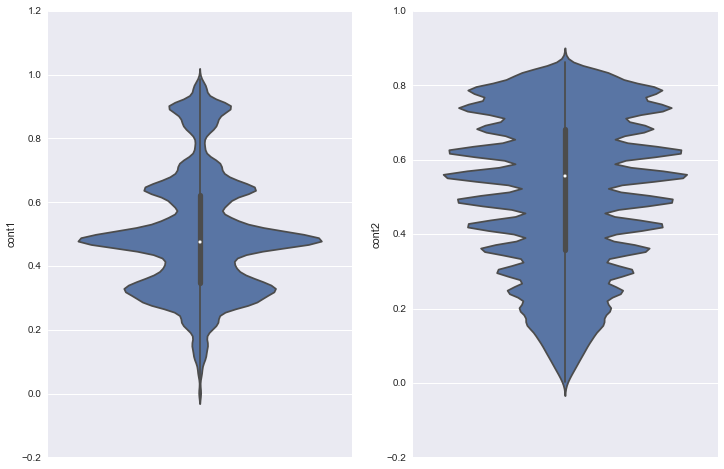

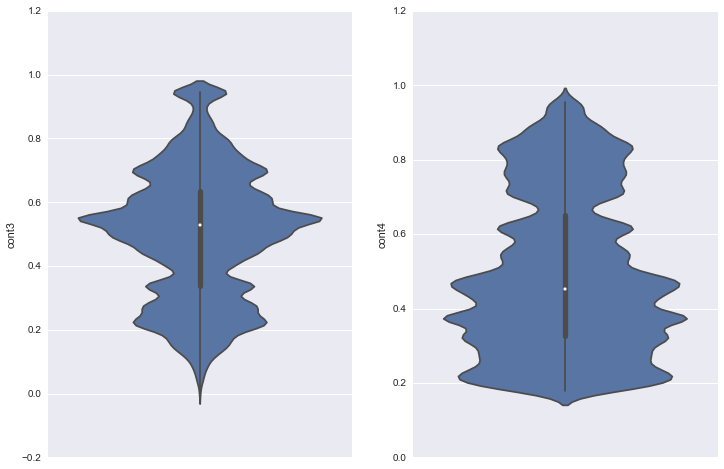

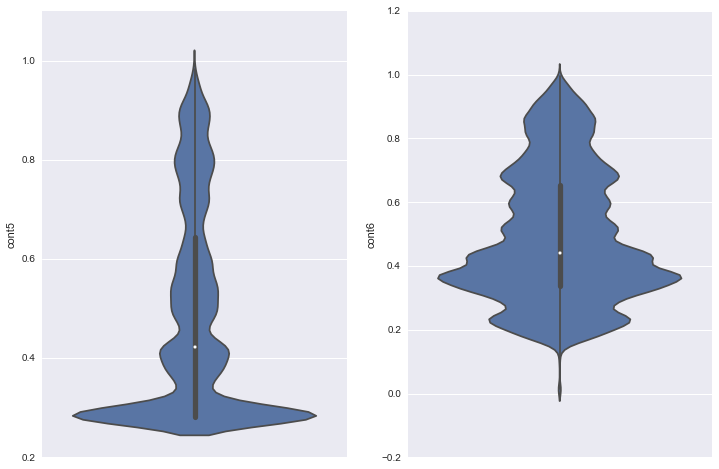

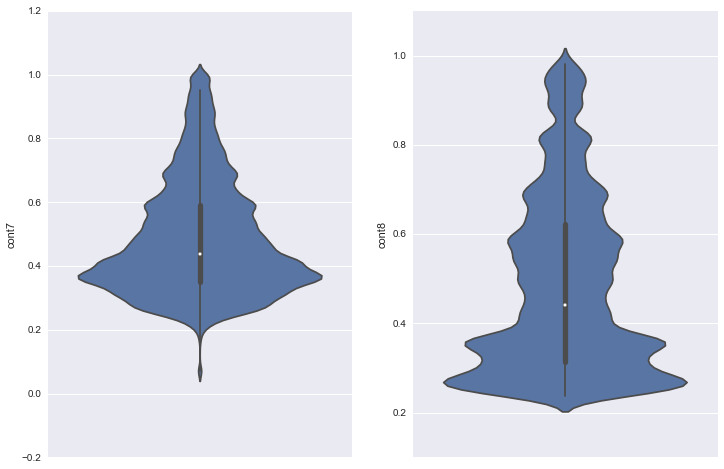

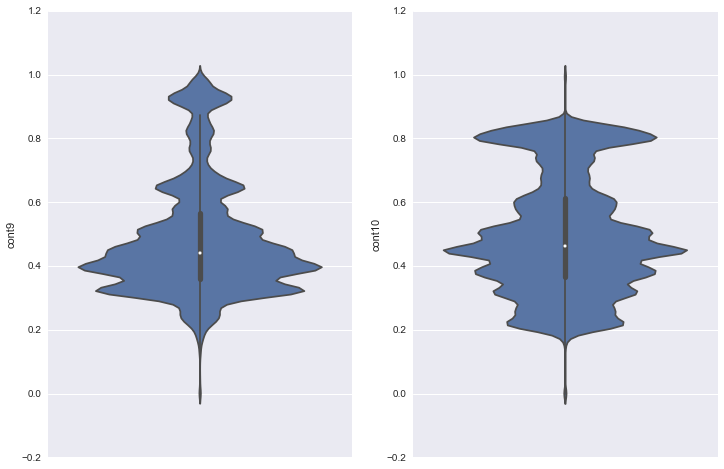

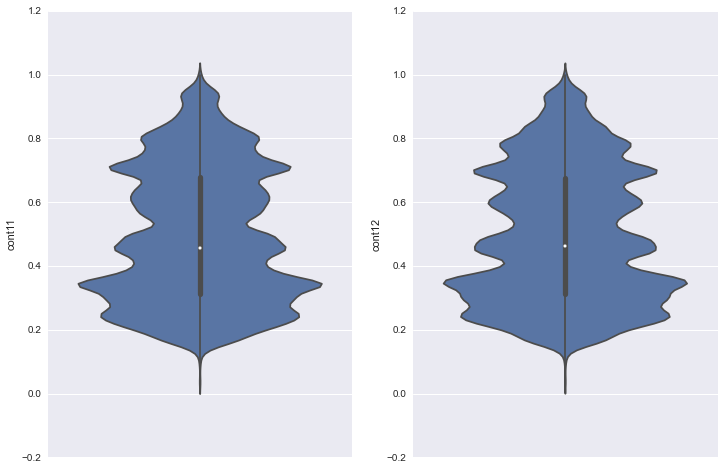

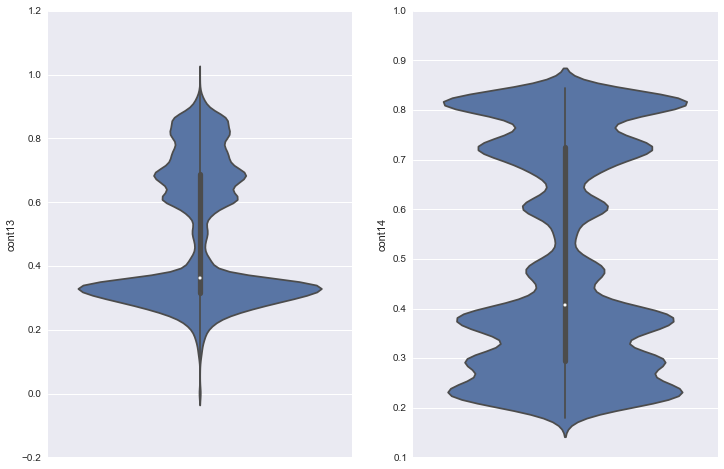

In [9]:
#plot violin for all attributes in a 7*2 grid

n_cols=2
n_rows=7
#displays the plots INSIDE the notebook, sns.plt.show() > displays the plots OUTSIDE of the notebook

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=dataset, ax=ax[j])
        
#leaining: cont1 has many close0.5, cont2 interval, cont3 many 0.5, 
#cont5 many 0.3, 

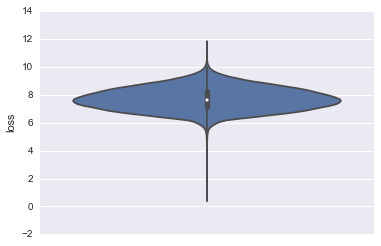

In [10]:
#check the label loss distribution 
#log1p function applies log(1+x) to all elements of the column, work for skew features
dataset['loss']=np.log1p(dataset['loss'])
sns.violinplot(data=dataset, y='loss')
plt.show()

In [11]:
#find correlation between continous features
# Calculates pearson co-efficient for all combinations
data_corr=data.corr()
threshold=0.5
#create a list and put high corrleation pair in
corr_list=[]


In [12]:
print(data_corr)

           cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
cont1   1.000000 -0.085180 -0.445431  0.367549 -0.025230  0.758315  0.367384   
cont2  -0.085180  1.000000  0.455861  0.038693  0.191427  0.015864  0.048187   
cont3  -0.445431  0.455861  1.000000 -0.341633  0.089417 -0.349278  0.097516   
cont4   0.367549  0.038693 -0.341633  1.000000  0.163748  0.220932 -0.115064   
cont5  -0.025230  0.191427  0.089417  0.163748  1.000000 -0.149810 -0.249344   
cont6   0.758315  0.015864 -0.349278  0.220932 -0.149810  1.000000  0.658918   
cont7   0.367384  0.048187  0.097516 -0.115064 -0.249344  0.658918  1.000000   
cont8   0.361163  0.137468 -0.185432  0.528740  0.009015  0.437437  0.142042   
cont9   0.929912 -0.032729 -0.417054  0.328961 -0.088202  0.797544  0.384343   
cont10  0.808551  0.063526 -0.325562  0.283294 -0.064967  0.883351  0.492621   
cont11  0.596090  0.116824  0.025271  0.120927 -0.151548  0.773745  0.747108   
cont12  0.614225  0.106250  0.006111  0.

In [13]:
#Search for the highly correlated pairs
for i in range(0,size):# size=15
    for j in range(i+1,size):
        if (data_corr.iloc[i,j]>=threshold and data_corr.iloc[i,j]<1) or (data_corr.iloc[i,j]<0 
                                                                          and data_corr.iloc[i,j]<=-threshold):
            corr_list.append([data_corr.iloc[i,j],i,j])

In [14]:
print(corr_list)

[[0.75831531643666994, 0, 5], [0.92991170576166049, 0, 8], [0.80855086943336496, 0, 9], [0.59608979614242341, 0, 10], [0.61422545467275957, 0, 11], [0.53484952374163819, 0, 12], [0.52874029721748017, 3, 7], [0.65891829680915648, 5, 6], [0.79754351899466136, 5, 8], [0.88335050684903871, 5, 9], [0.77374545355183644, 5, 10], [0.78514397243737277, 5, 11], [0.81509107652085133, 5, 12], [0.74710791678856836, 6, 10], [0.74271226325000417, 6, 11], [0.78569679149602867, 8, 9], [0.60800046981123412, 8, 10], [0.62665643732725684, 8, 11], [0.64202769488824551, 8, 12], [0.70289554350783912, 9, 10], [0.71381193326514636, 9, 11], [0.7078763931019546, 9, 12], [0.99438411002154259, 10, 11]]


In [15]:
s_corr_list=sorted(corr_list, key=lambda x: -abs(x[0]))
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


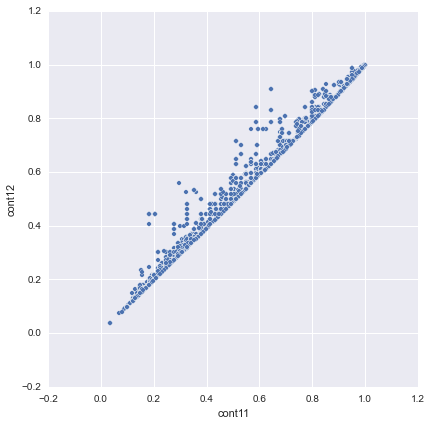

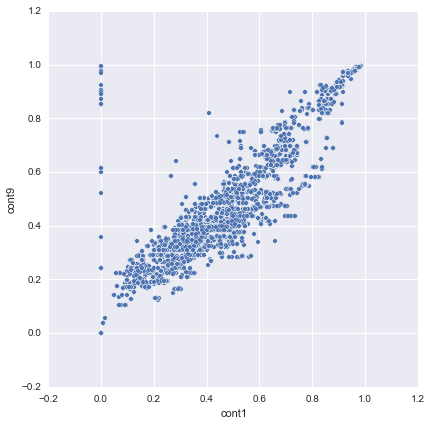

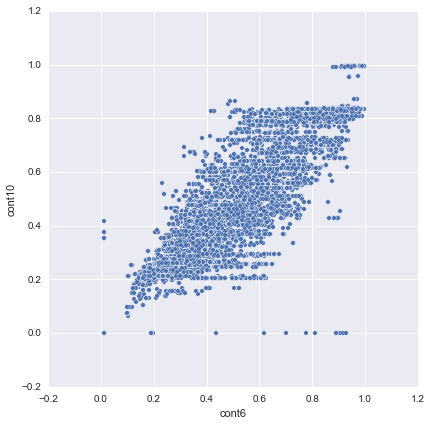

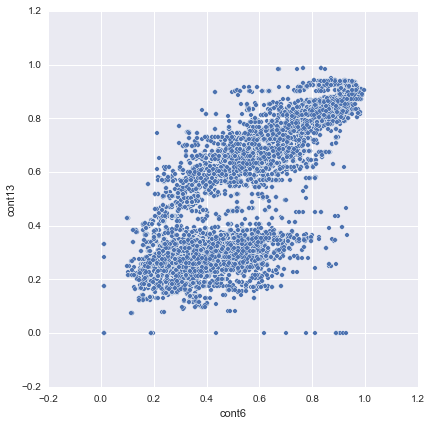

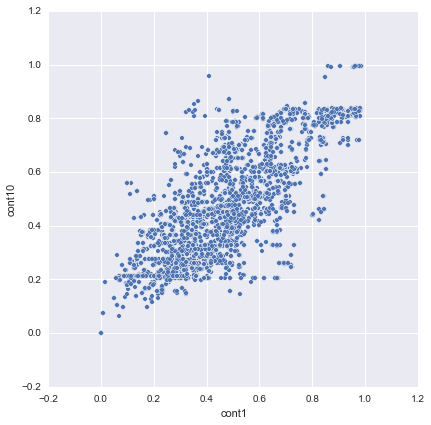

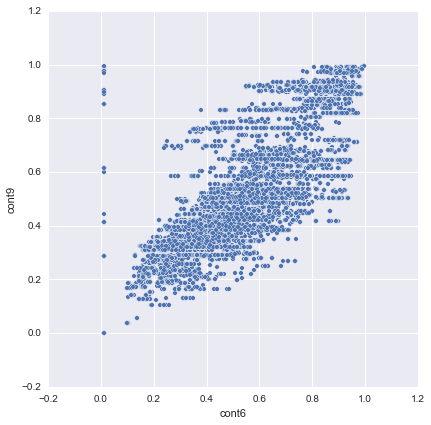

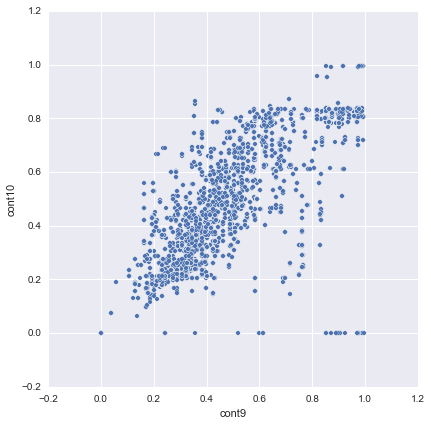

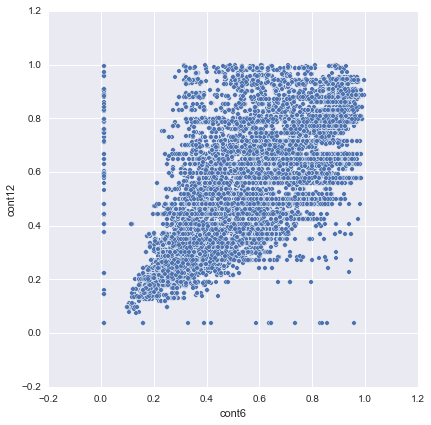

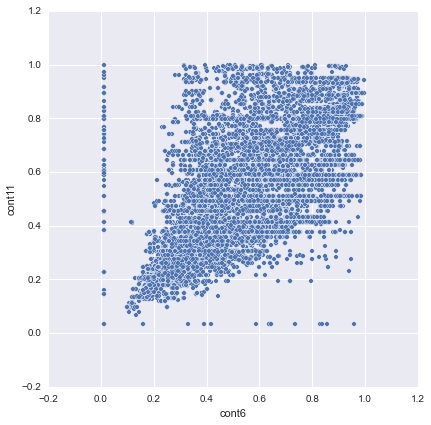

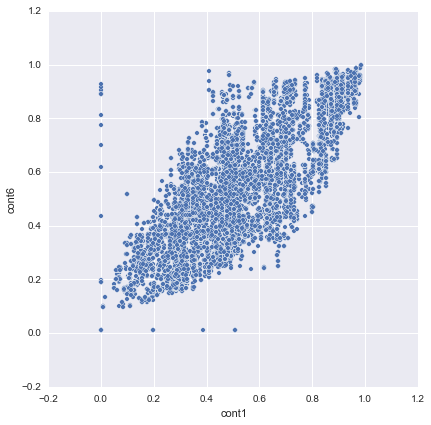

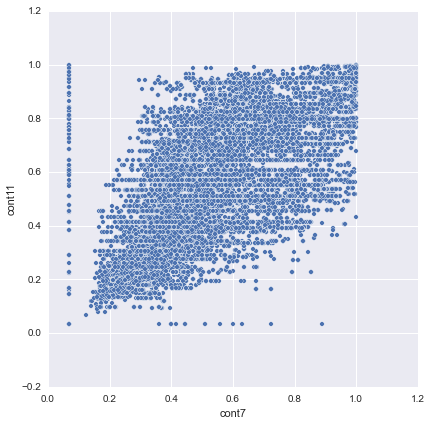

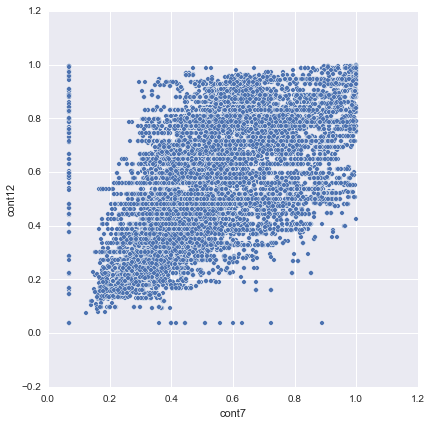

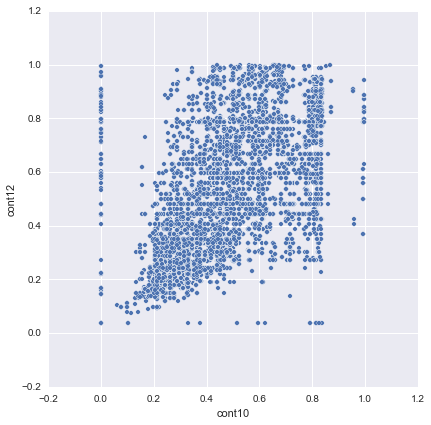

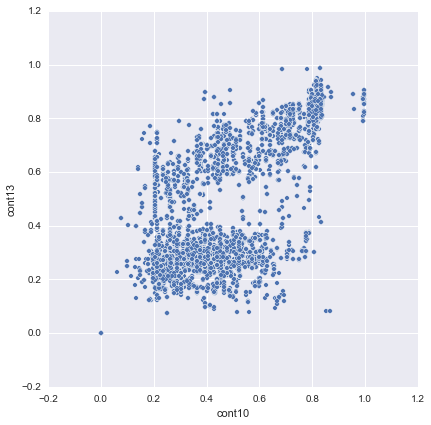

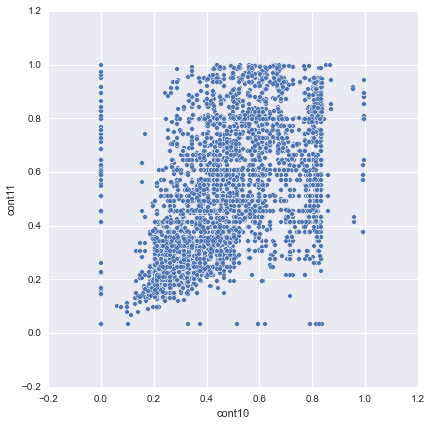

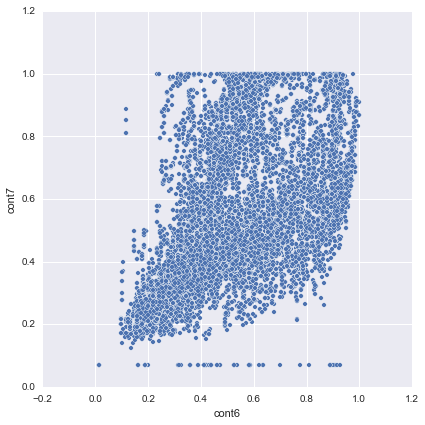

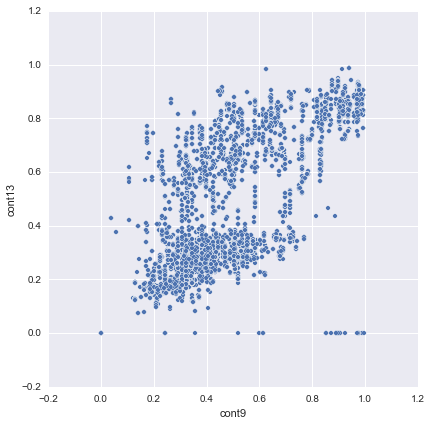

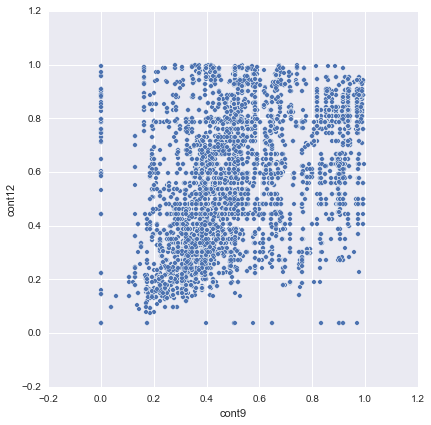

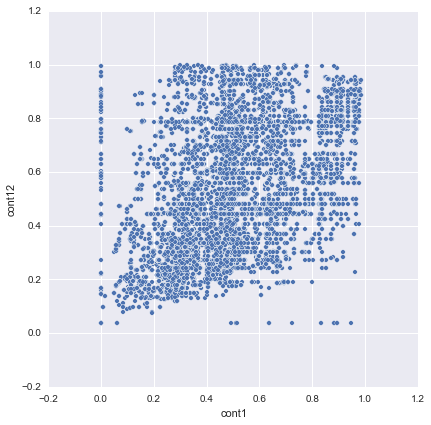

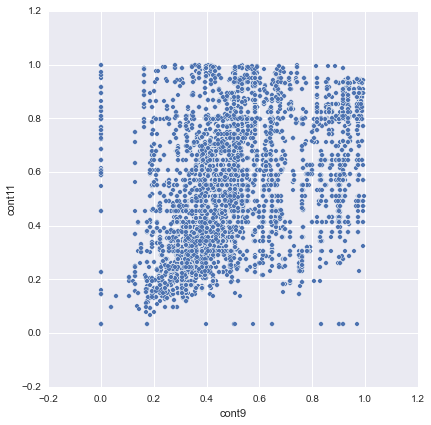

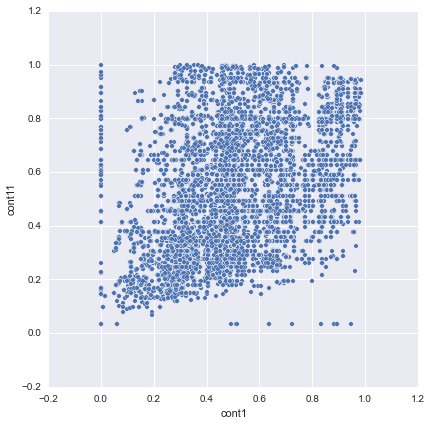

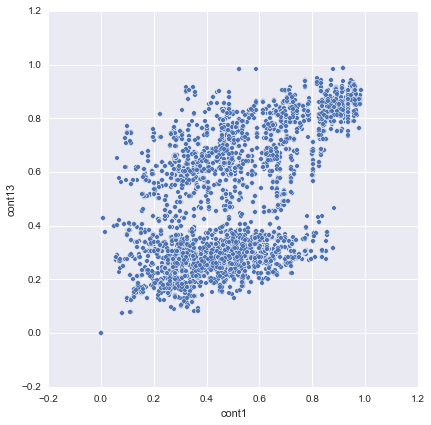

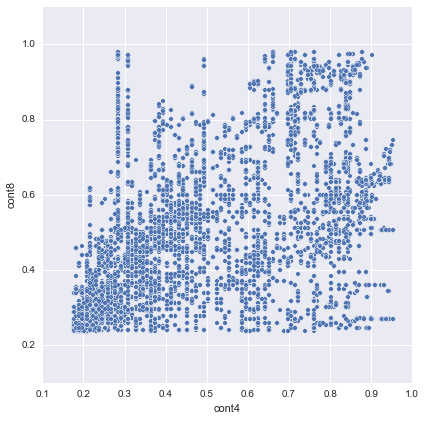

In [16]:
#scatter plot of high corrleated pairs to find if some features could be removed 
for v,i,j in s_corr_list:
    sns.pairplot(dataset, size=6, x_vars=cols[i], y_vars=cols[j])
    plt.show()
    
# correlation score combin with plot is the best way to find corrleation cont11 and cont12 one must be removed
#cont1 and cont9 highly correlated,one of them could be removed saftly 

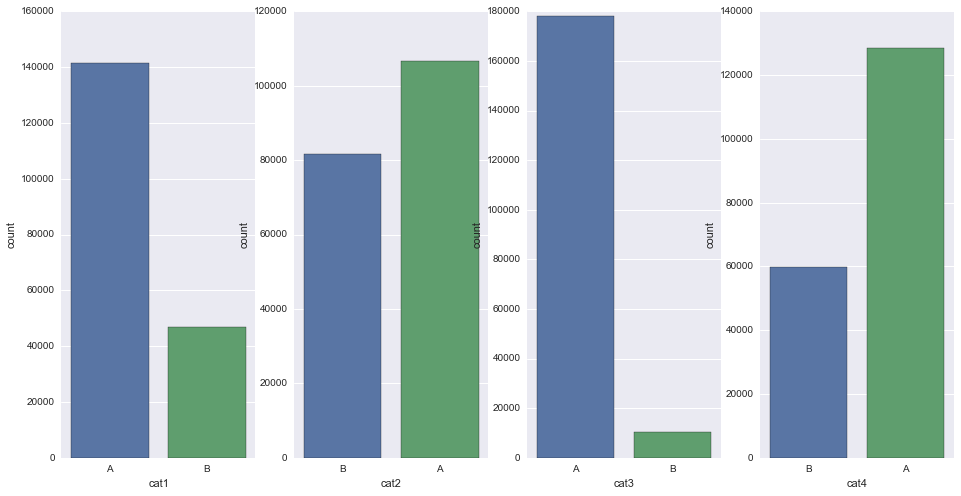

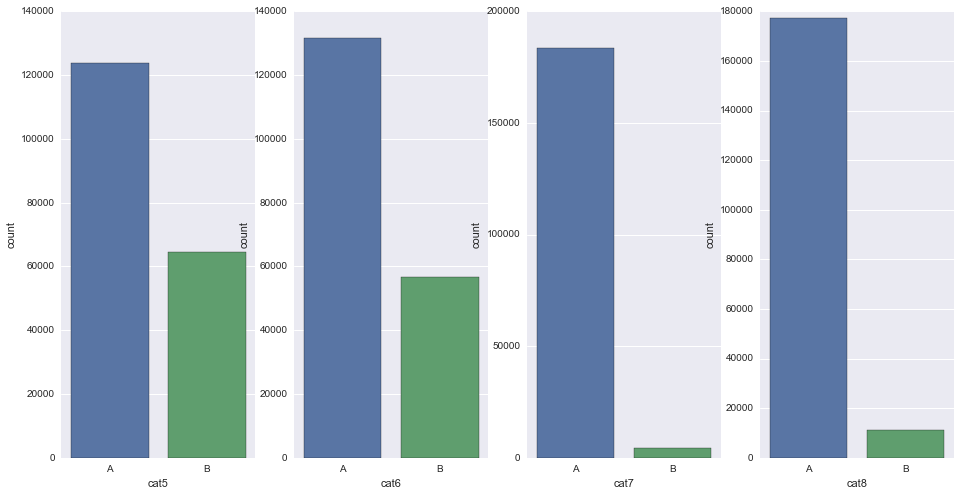

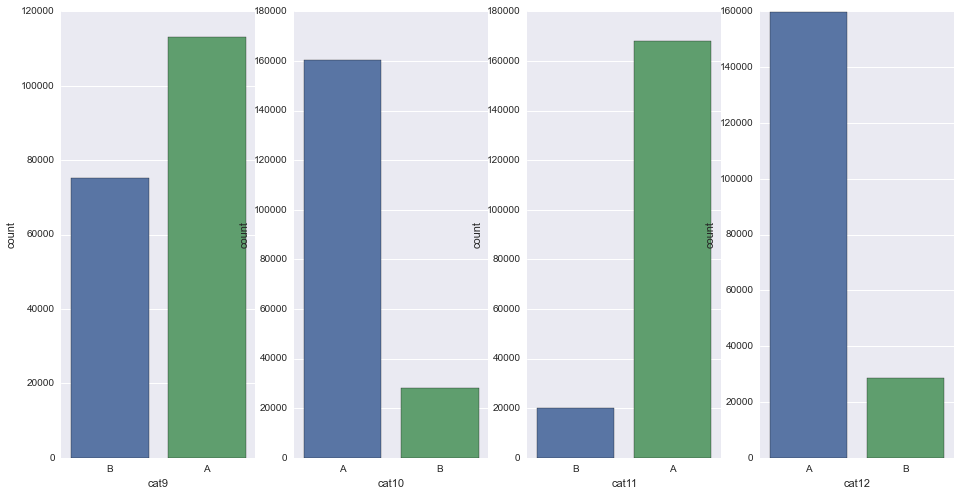

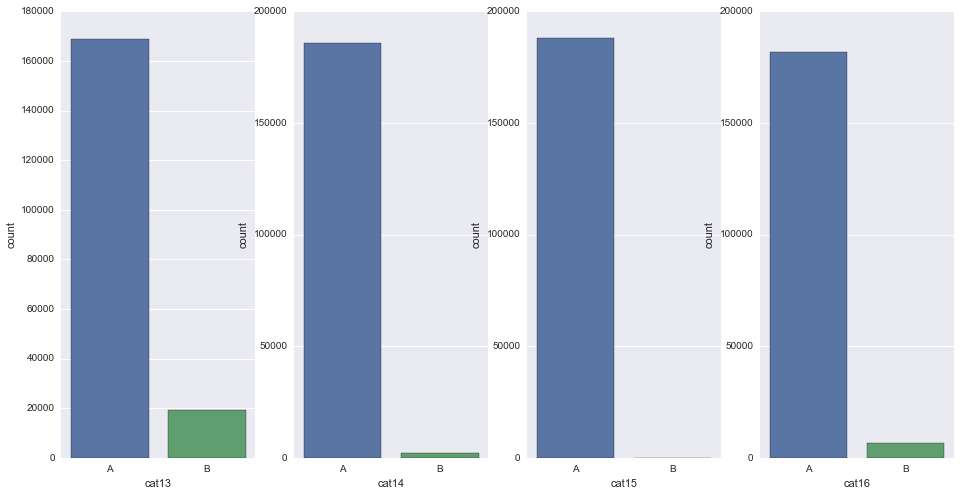

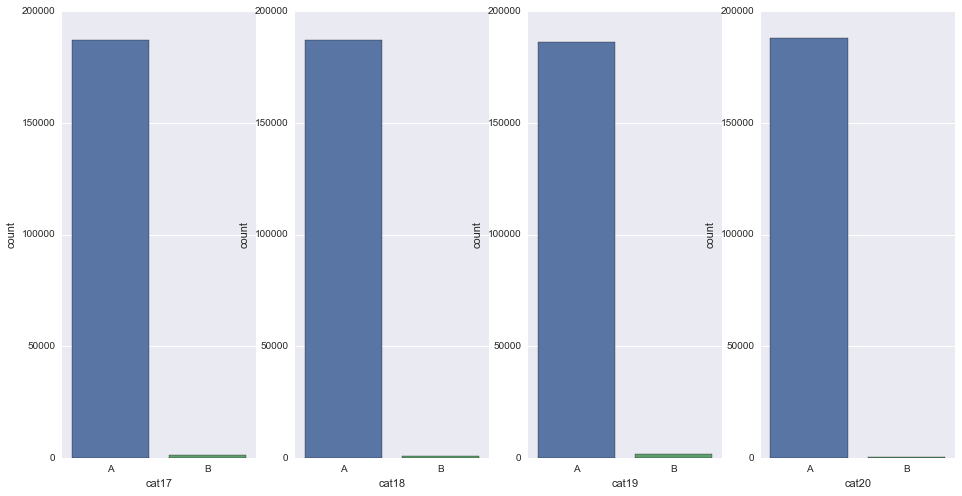

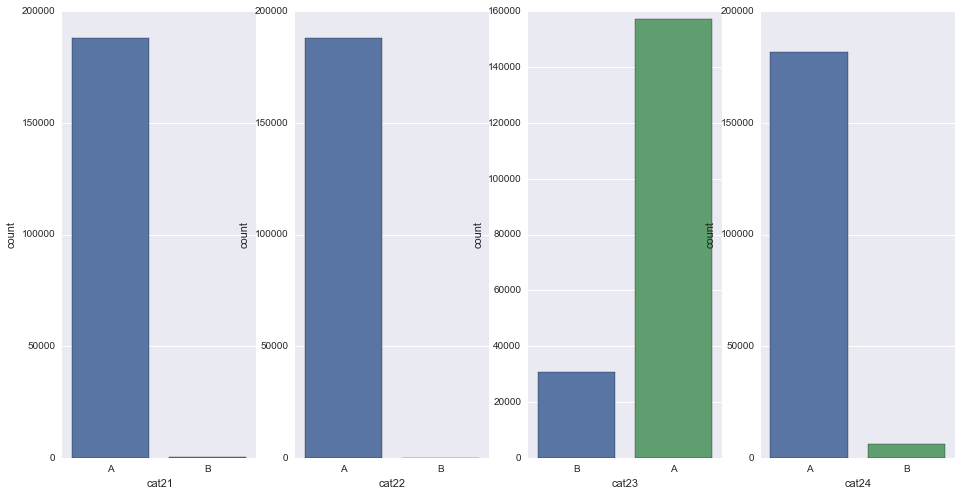

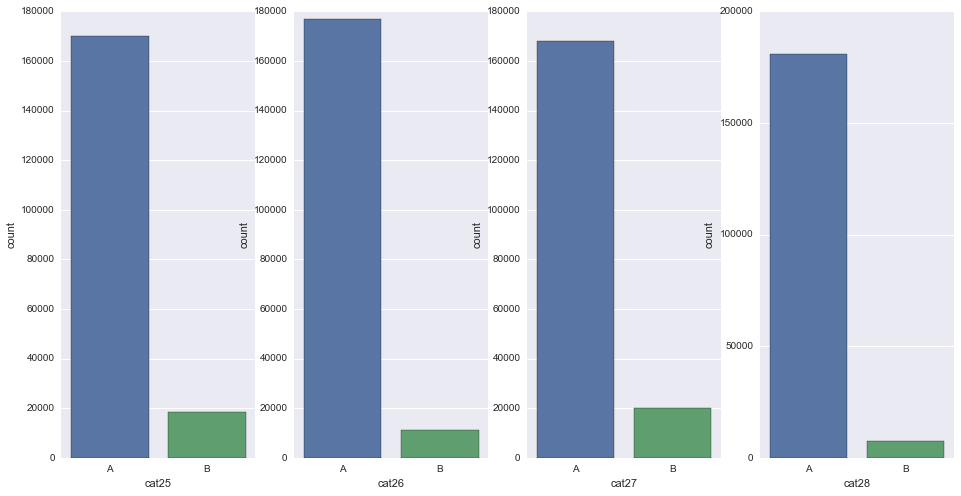

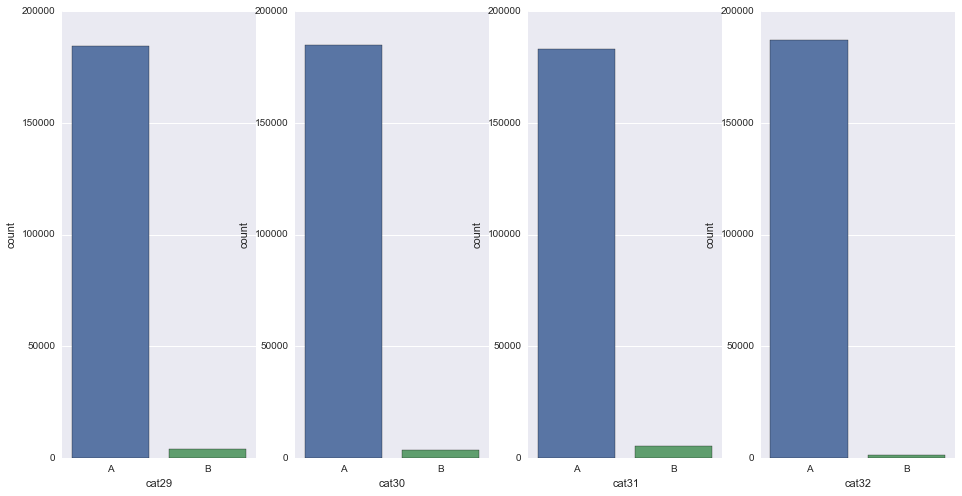

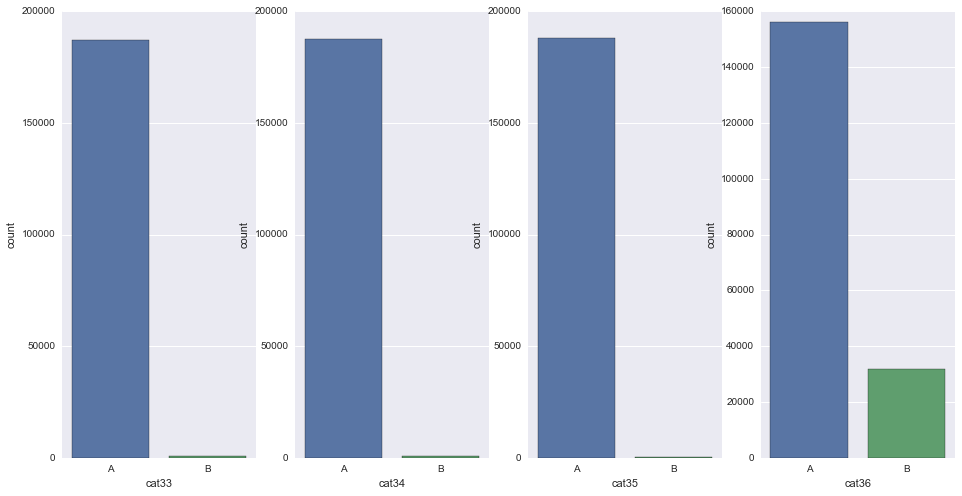

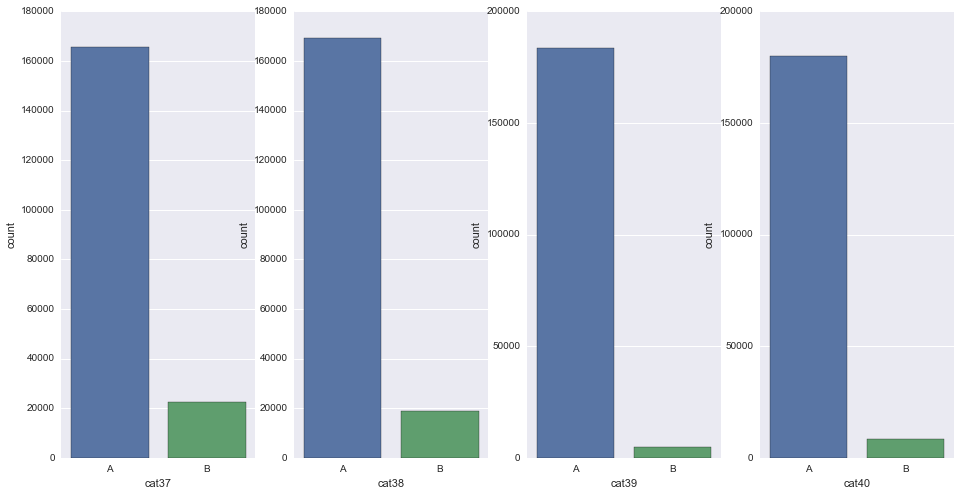

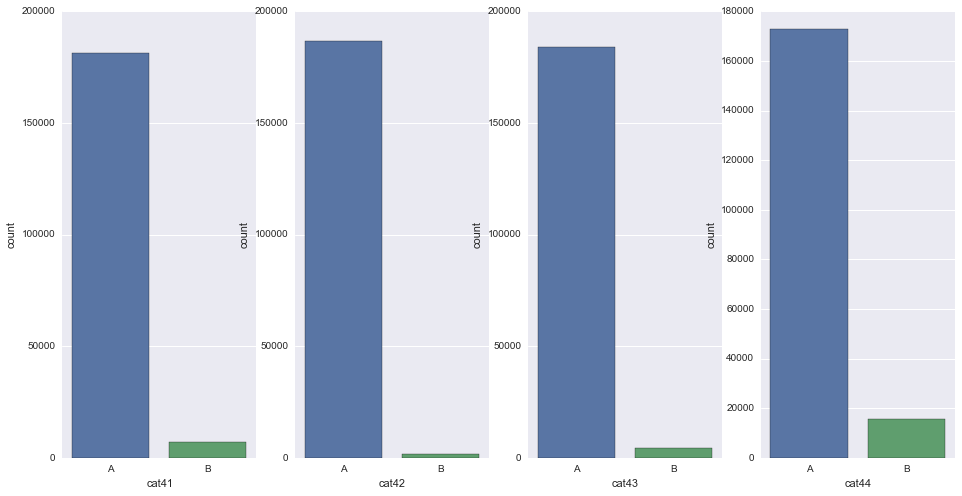

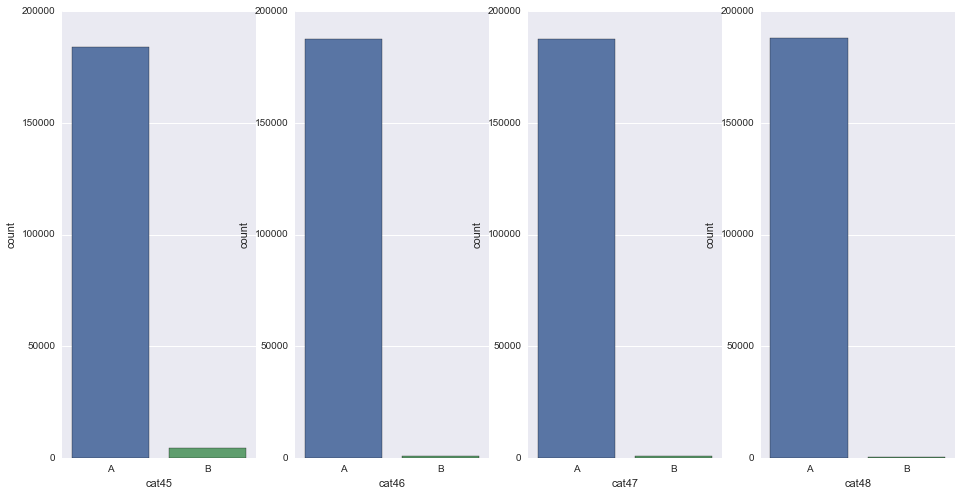

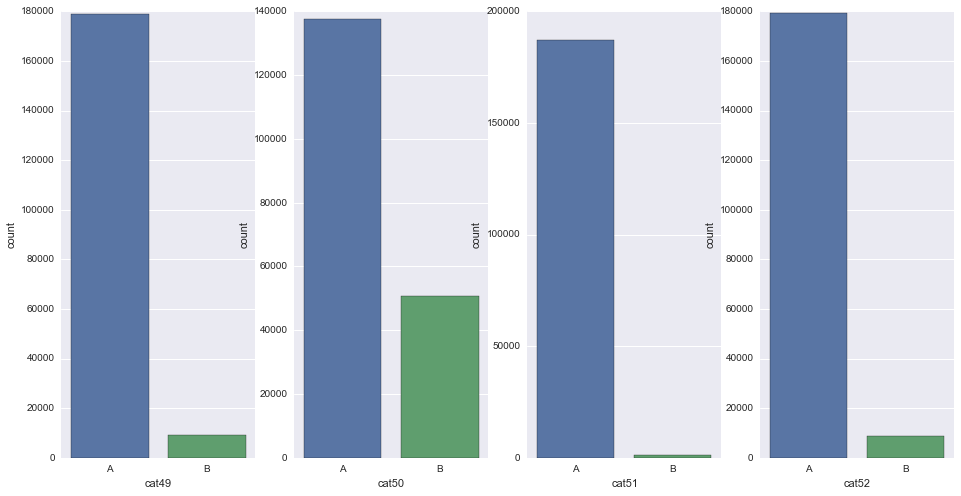

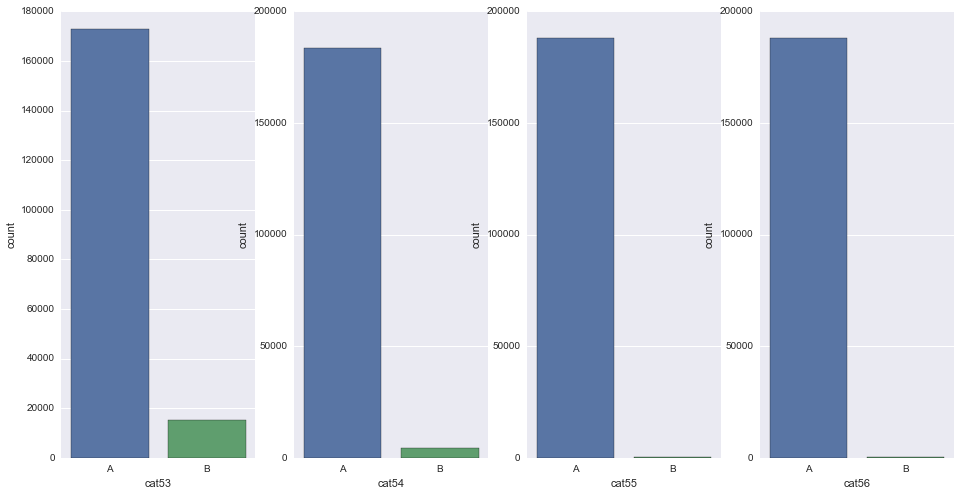

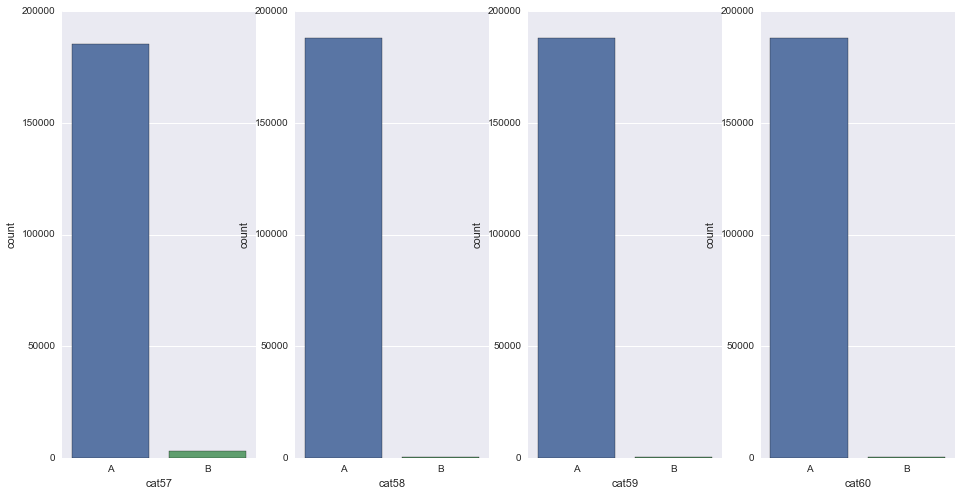

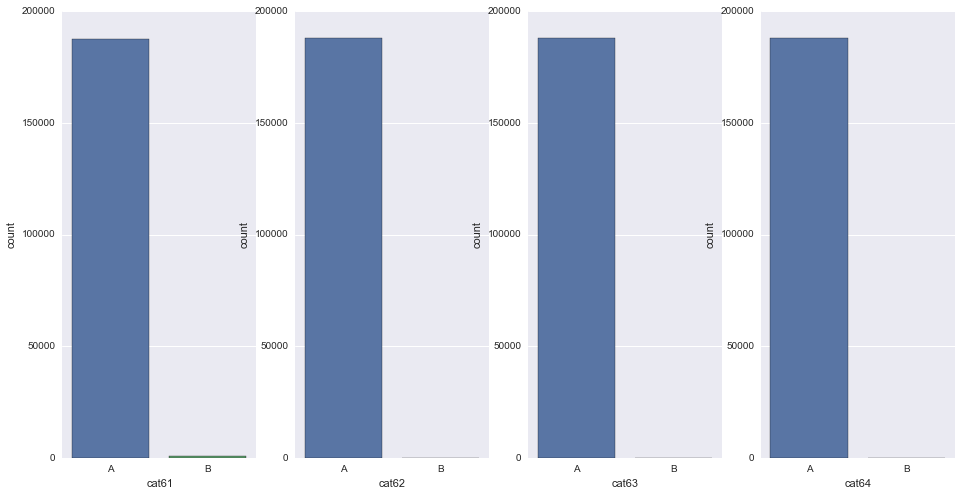

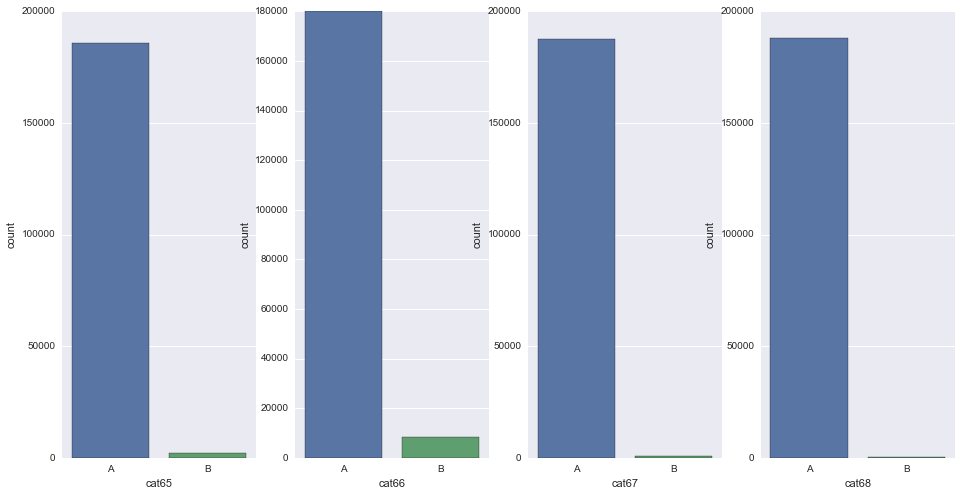

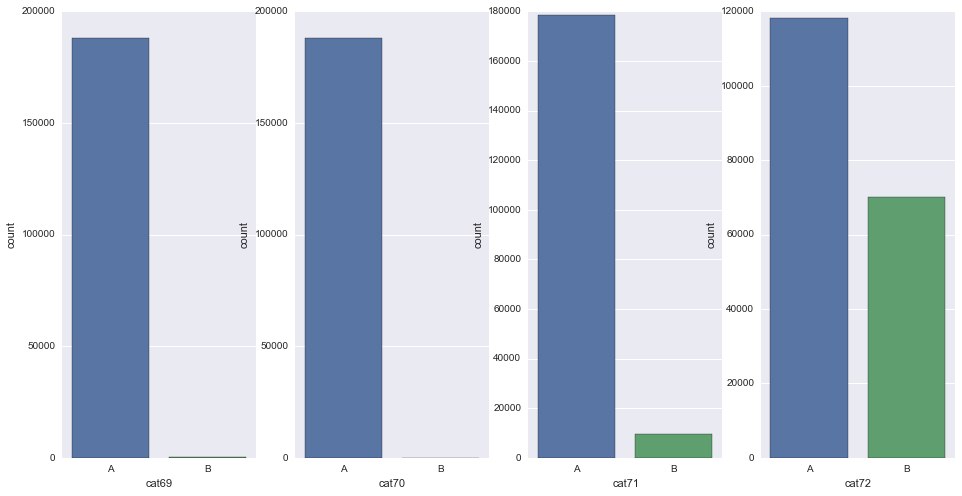

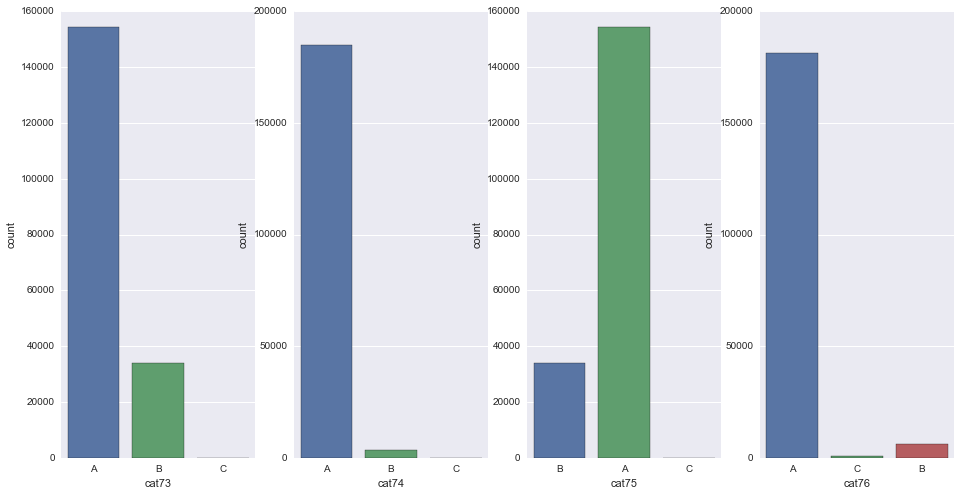

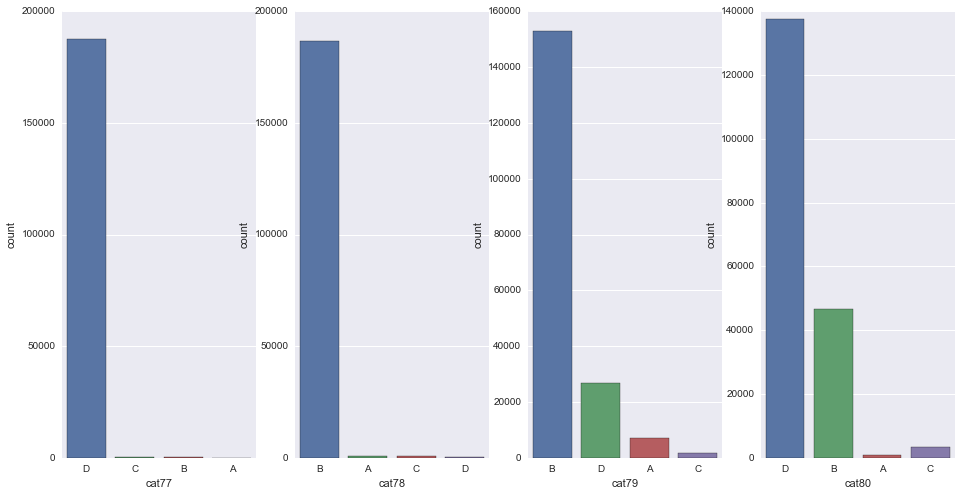

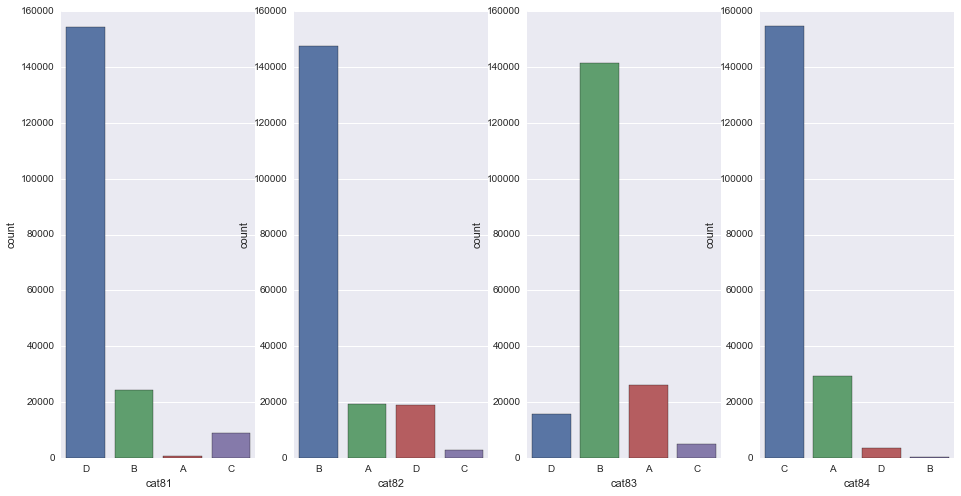

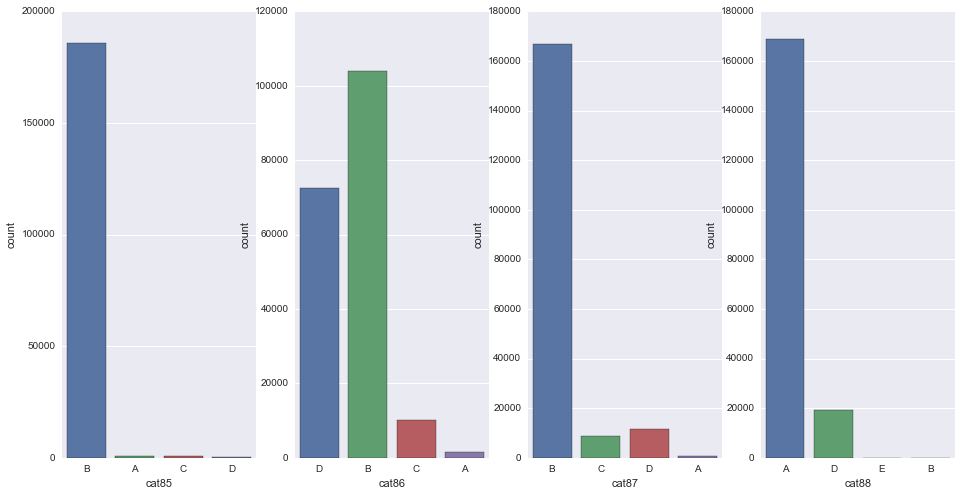

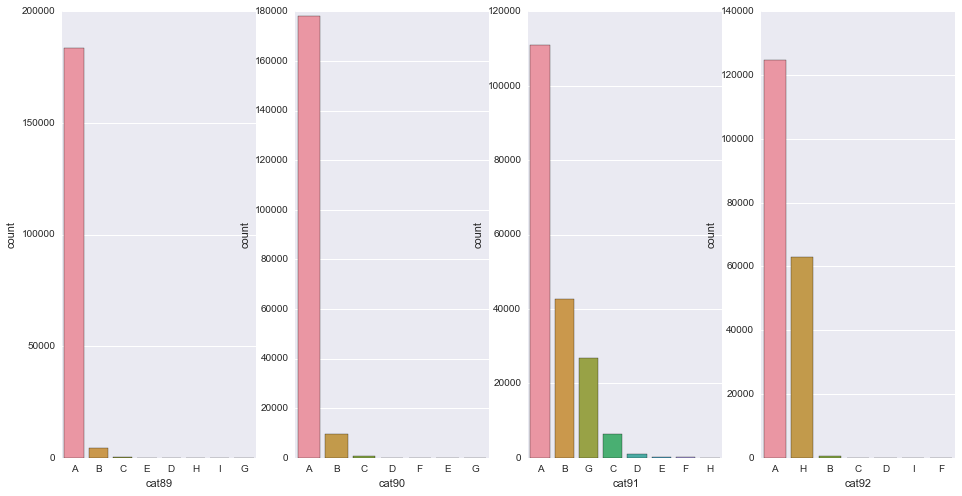

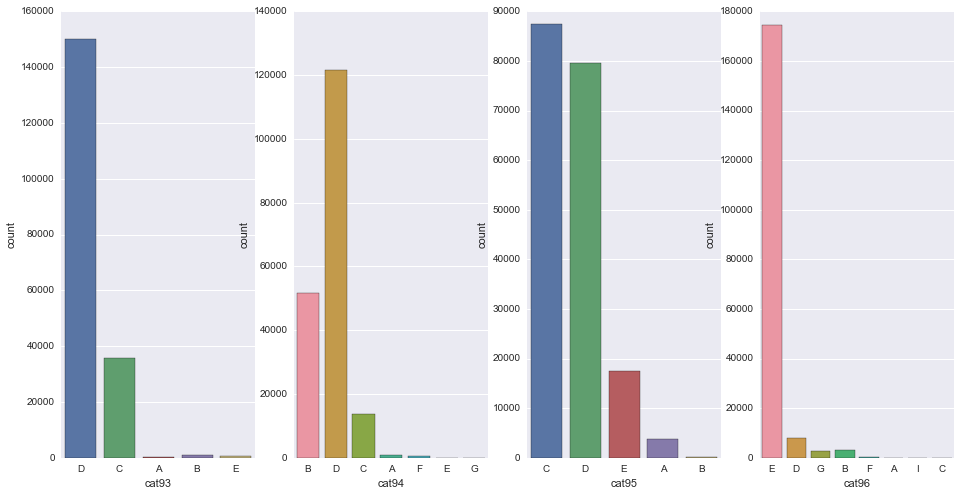

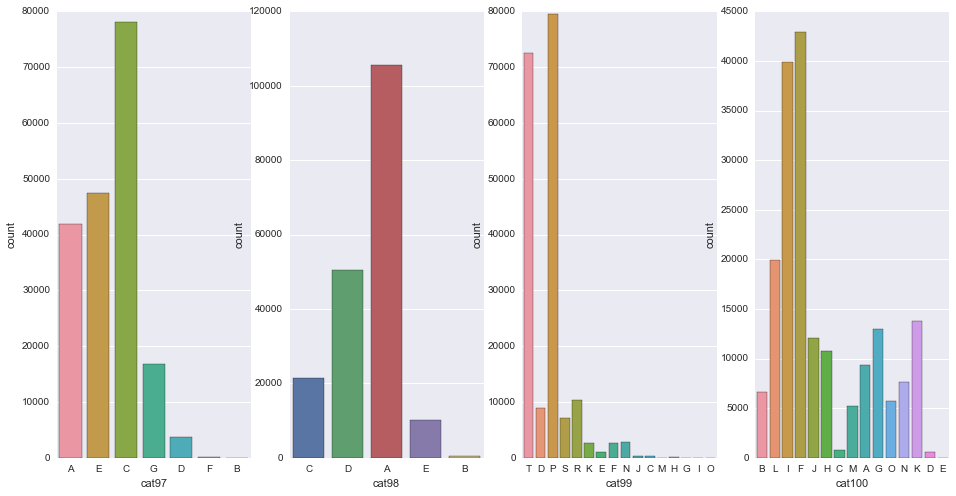

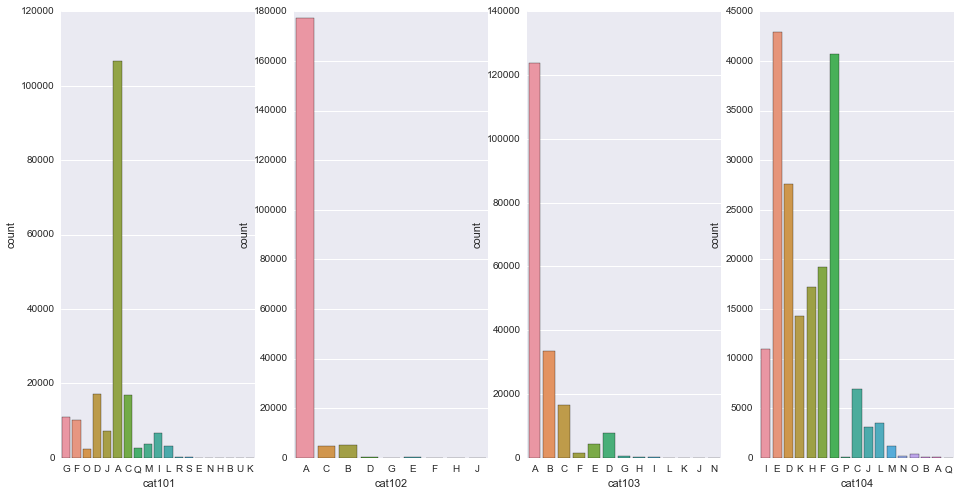

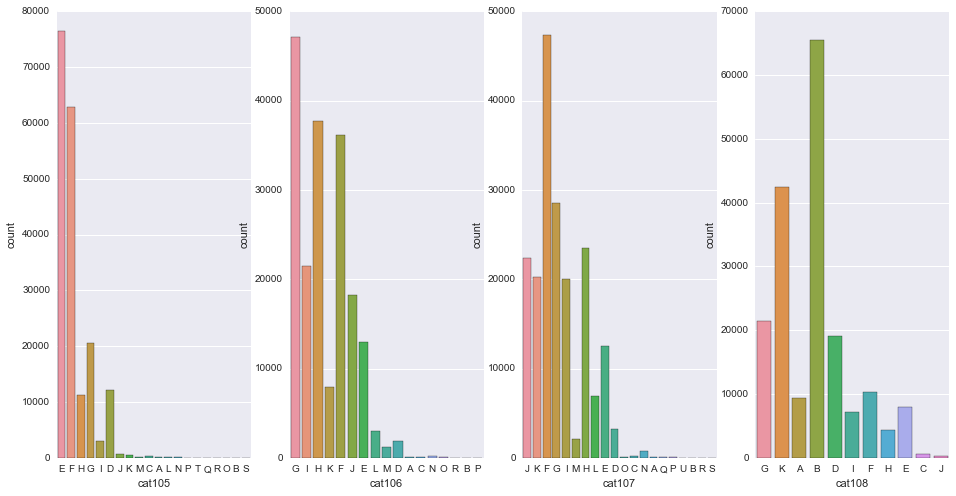

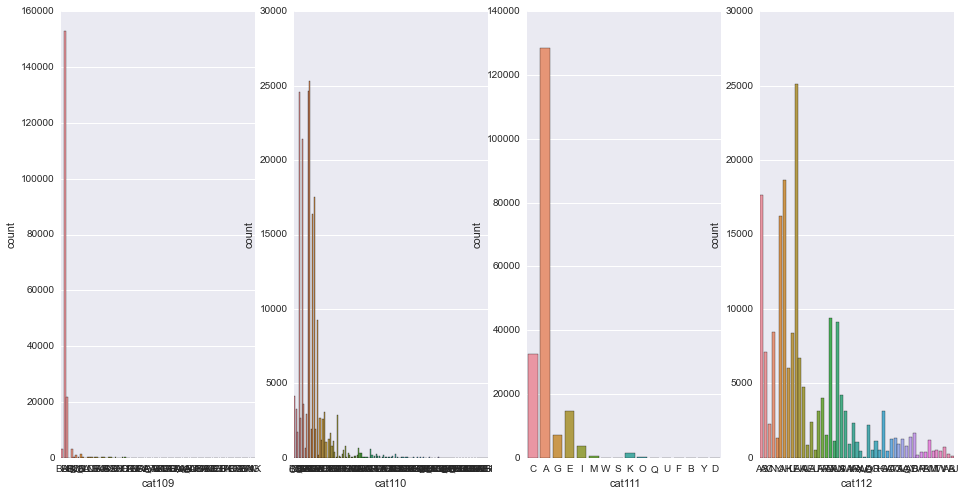

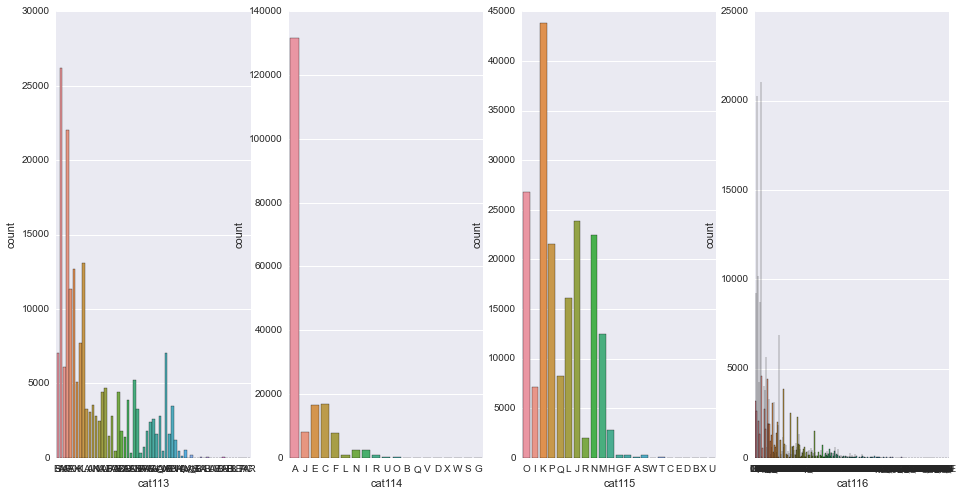

In [17]:
#exploration for category features *116
cols=dataset.columns

n_cols=4
n_rows=29
%matplotlib inline
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(16, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j],data=dataset, ax=ax[j])

In [18]:
#One-hot encoding  feature cat1-cat116
#Variable to hold the list of variables for an attribute in the train and test data
labels = []

for i in range(0,split):
    train = dataset[cols[i]].unique()
    test = dataset_test[cols[i]].unique()
    labels.append(list(set(train) | set(test)))    

del dataset_test

#labels list contain unique attribute in train dan test data

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#create a list conatin new features
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset.iloc[:,i])
    feature = feature.reshape(dataset.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)



In [20]:
encoded_cats = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats.shape)

#Concatenate encoded attributes with continuous attributes
dataset_encoded = np.concatenate((encoded_cats,dataset.iloc[:,split:].values),axis=1)
del cats
del feature
del dataset
del encoded_cats
print(dataset_encoded.shape)

(188318, 1176)
(188318, 1191)


In [21]:
r, c = dataset_encoded.shape
#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

In [22]:
# X is features set, Y is the target label
X = dataset_encoded[:,0:(c-1)]
Y = dataset_encoded[:,(c-1)]

In [23]:
from sklearn import cross_validation
val_size = 0.1
seed=0
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)
del X
del Y

In [24]:
X_all = [] # conatin all features
comb = [] #list of combination
mae = []# a list to contain different models mae
from sklearn.metrics import mean_absolute_error
n = "All"
X_all.append([n, i_cols])

In [ ]:
# Model fitting
# 1 Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
algo = "LR"

#Accuracy of the model using all features
for name,i_cols_list in X_all:
    model.fit(X_train[:,i_cols_list],Y_train)
    result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val[:,i_cols_list])))
    mae.append(result)
    print(name + " %s" % result)
comb.append(algo)


#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show()    